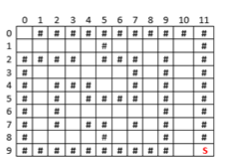

1. Criar o labirinto
2. Printar o labirinto
3. Posicionar o robô em uma posição aleatória
4. Movimentação
    - Procura por 'S' em todas as direções 
        - Caso encontre -> Acabou o jogo
        - Caso não encontre --> Continua a jogo
    - Procurar por ' ' em todas as direções
        - Caso encontre --> Mover, trocar por - e adicionar a pilha
        - Caso não encontre --> Retornar usando a pilha 
    - Repetir processo

In [1]:
import time
from random import choice, randint
import copy as cp
from IPython.display import clear_output
from tabulate import tabulate

In [2]:
# labirinto = {
#     0:{0: ' ', 1: '#', 2: '#', 3: '#', 4: '#', 5: '#', 6: '#', 7: '#', 8: '#', 9: '#', 10: '#', 11: '#'},
#     1:{0: ' ', 1: ' ', 2: ' ', 3: ' ', 4: ' ', 5: '#', 6: ' ', 7: ' ', 8: ' ', 9: ' ', 10: ' ', 11: '#'},
#     2:{0: '#', 1: '#', 2: '#', 3: '#', 4: ' ', 5: '#', 6: '#', 7: '#', 8: ' ', 9: '#', 10: ' ', 11: '#'},
#     3:{0: '#', 1: ' ', 2: ' ', 3: ' ', 4: ' ', 5: ' ', 6: ' ', 7: '#', 8: ' ', 9: '#', 10: ' ', 11: '#'},
#     4:{0: '#', 1: ' ', 2: '#', 3: '#', 4: '#', 5: ' ', 6: ' ', 7: '#', 8: ' ', 9: '#', 10: ' ', 11: '#'},
#     5:{0: '#', 1: ' ', 2: '#', 3: ' ', 4: '#', 5: '#', 6: '#', 7: '#', 8: ' ', 9: '#', 10: ' ', 11: '#'},
#     6:{0: '#', 1: ' ', 2: '#', 3: ' ', 4: ' ', 5: ' ', 6: ' ', 7: ' ', 8: ' ', 9: '#', 10: ' ', 11: '#'},
#     7:{0: '#', 1: ' ', 2: '#', 3: ' ', 4: '#', 5: '#', 6: ' ', 7: '#', 8: ' ', 9: '#', 10: ' ', 11: '#'},
#     8:{0: '#', 1: ' ', 2: ' ', 3: ' ', 4: ' ', 5: '#', 6: ' ', 7: ' ', 8: ' ', 9: '#', 10: ' ', 11: '#'},
#     9:{0: '#', 1: '#', 2: '#', 3: '#', 4: '#', 5: '#', 6: '#', 7: '#', 8: '#', 9: '#', 10: ' ', 11: ' '},
# }


# def printar_labirinto_v2(labirinto: dict) -> None:
#     '''Printa um dicionário no formato estabelecido de labirinto'''
    
#     for ts in ["grid", "fancy_grid", "pretty"]:
#         headers = {chave: letra for chave, letra in zip(labirinto[0].keys(), ascii_uppercase)}
#         print(tabulate(labirinto.values(),showindex='always' , tablefmt=ts, headers=headers))
        
#     return None


# printar_labirinto_v2(labirinto)

In [3]:
def printar_labirinto(labirinto: list) -> None:
    '''Printa um dicionário no formato estabelecido de labirinto'''
    # titulo 
    print('   '+' '.join([str(x).zfill(2) for x in range(len(labirinto[0]))]))

    # 
    for i, linha in enumerate(labirinto):
        print(str(i).zfill(2)+' '+' '.join([x.rjust(2, x) for x in linha]))

    return None

In [4]:
def posicionar_aleatorio(labirinto:list , caracter_a_posicionar:str, lista_a_ignorar:list or None = None) -> tuple:
    '''Posiciona um caracter em uma posição valida
    
    labirinto: lista de listas
    caracter_a_posicionar: qual caracter deve ser posicionado
    lista_a_ignorar: lista de caracteres, os quais o caracter_a_posicionar nao pode ocupar a posicao
    
    retorna: uma tupla linha, coluna da posição em que o robo foi inserido
    '''
    
    linha = randint(0, len(labirinto)-1)
    coluna = randint(0, len(labirinto[0])-1)
    
    if labirinto[linha][coluna] in lista_a_ignorar:
        return posicionar_aleatorio(labirinto, caracter_a_posicionar, lista_a_ignorar)
    
    labirinto[linha][coluna] = caracter_a_posicionar
    
    return linha, coluna

In [5]:
def procurar_direcional(labirinto:dict, posicao_atual:tuple, procurado:str) -> tuple or bool:
    '''Verifica se o robo pode ser movimentar para uma posição procurada
    
    retorna False se o robo NÃO pode se movimentar para um caractere/posição procurado,
    retorna A POSIÇÃO se o robo pode se movimenta para um caractere/posição procurado'''
   
    linha = posicao_atual[0]
    coluna = posicao_atual[1]
    lista_direcoes = ['direita', 'esquerda', 'baixo', 'cima']
    
    for _ in range(4):
        direcao_escolhida = choice(lista_direcoes)
        lista_direcoes.remove(direcao_escolhida)
        
        try:
            # para direita
            if (direcao_escolhida == 'direita') and (labirinto[linha][coluna+1] == procurado):
                return linha, coluna+1

            # para esquerda
            elif (direcao_escolhida == 'esquerda') and labirinto[linha][coluna-1] == procurado:
                return linha, coluna-1

            # para baixo
            elif (direcao_escolhida == 'baixo') and labirinto[linha+1][coluna] == procurado:
                return linha+1, coluna

             # para cima
            elif (direcao_escolhida == 'cima') and labirinto[linha-1][coluna] == procurado:
                return linha-1, coluna
        except:
            # nao possui espaço para movimentação em um dos lados (key eror)
            pass
            
        
    # nao foi encontrado
    return False

In [6]:
def retornar_labirinto_padrao(n_linha, n_coluna):
    labirinto = []
    for i in range(n_linha):

        # primeira e ultimas linhas
        if i == 0 or i == n_linha-1:
            linha = ['#' for j in range(n_coluna)]

        # outros
        else:
            linha = ['#'] + ['|' for j in range(n_coluna-2)] + ['#']

        labirinto.append(linha)
    
    return labirinto

In [7]:
def preencher_paredes(lab):
    for linha in lab:
        for j in range(len(linha)):
            if linha[j] != '#':
                linha[j] = choice(['P', 'P', ' ', ' ', ' '])

#     Proximo teste
#     56 --> '#' --> Não muda
#     54 --> 'P'
#     90 --> 

In [8]:
def contar_espacos(labirinto, caracter=' '):
    qtd = 0
    for linha in labirinto:
        for valor in linha:
            if valor == caracter:
                qtd += 1
    return qtd

In [9]:
def func_aux(labirinto, posicao_atual):
    
    contador = 0
    
    pilha_de_entradas = []
    
    while True:
        try:
            # movimentacao para ' '
            if procurar_direcional(labirinto, posicao_atual, ' '):
                # salvar na pilha
                pilha_de_entradas.append(posicao_atual)

                # colocando '-' na posicao atual
                labirinto[posicao_atual[0]][posicao_atual[1]] = '-'

                # mudando a posição do X
                posicao_atual = procurar_direcional(labirinto, posicao_atual, ' ')
                labirinto[posicao_atual[0]][posicao_atual[1]] = 'X'

                contador += 1

            # nao tem ' ' em volta --> volta o caminho
            else:
                labirinto[posicao_atual[0]][posicao_atual[1]] = '-'

                posicao_atual = pilha_de_entradas.pop()
                labirinto[posicao_atual[0]][posicao_atual[1]] = 'X'

        except: 
            return contador
    

In [12]:
def alterar_caracteres(labirinto, carac_anterior, carac_futuro):
    for linha in labirinto:
        for i in range(len(linha)):
            linha[i] = linha[i].replace(carac_anterior, carac_futuro)

In [13]:
def criar_labirinto(n_linha, n_coluna):
    
    inicio_tempo = time.perf_counter() 
    
    labirinto = retornar_labirinto_padrao(n_linha, n_coluna)
    preencher_paredes(labirinto)
    
    posicao_atual = posicionar_aleatorio(labirinto, 'X', ['#', 'P'])
    
    qtd_vazios = contar_espacos(labirinto, ' ')

    contador_referencia = func_aux(cp.deepcopy(labirinto), posicao_atual)
    
    while True:
        for i in range(len(labirinto)):

            for j in range(len(labirinto[0])):

                if labirinto[i][j] == 'P':
                    
                    # simulando a mudanca

                    copia_labirinto = [linha.copy() for linha in cp.deepcopy(labirinto)].copy()
                    
                    copia_labirinto[i][j] = ' '

                    posicao_do_alterado = posicionar_aleatorio(copia_labirinto, 'P', ['X', '#', 'P'])

                    contador = func_aux(copia_labirinto, posicao_atual)
                    
                    if contador == qtd_vazios:
                        # encontrou o labirinto 
                
                        # faz a ultima alteracao
                        labirinto[i][j] = ' '
                        labirinto[posicao_do_alterado[0]][posicao_do_alterado[1]] = 'P'
                        
                        # padronizacao dos caracteres
                        alterar_caracteres(labirinto, 'X', ' ')
                        
                        return labirinto
                    
                    elif contador > contador_referencia+1:
                        # faz a mudanca
                        labirinto[i][j] = ' '
                        labirinto[posicao_do_alterado[0]][posicao_do_alterado[1]] = 'P'
                    
                    else:
                        # nao faz a mudanca
                        pass
                    
                    if time.perf_counter() - inicio_tempo > n_linha:
                        # desisti desse labirinto e deve testar outro --> tempo arbitrario
                        return False
                        

                    contador_referencia = contador

                else: 
                    pass

In [14]:
def gerar_entrada_ou_saida(labirinto, caractere_colocado):
    while True:
        copia_labirinto = cp.deepcopy(labirinto)
        posicao = posicionar_aleatorio(copia_labirinto, caractere_colocado, ['P', ' '])
        if procurar_direcional(copia_labirinto, posicao, ' '):
            labirinto[posicao[0]][posicao[1]] = caractere_colocado
            return posicao[0], posicao[1]

In [15]:
def gerar_labirinto_completo(n_linha, n_coluna):
    while True:
        print(f'Gerando labirinto...')

        labirinto = criar_labirinto(n_linha, n_coluna)
        if labirinto:
            print('O labirinto foi gerado!\n')
            break
    
    # gerando entrada
    posicao_entrada = gerar_entrada_ou_saida(labirinto, ' ')

    # gerando saida
    gerar_entrada_ou_saida(labirinto, 'S')
    
    # alterando P por #
    alterar_caracteres(labirinto, 'P', '#')


    
    return labirinto, posicao_entrada

In [16]:
def jogo_labirinto(labirinto, posicao_robo):
    
    clear_output(wait=True)
    
    if posicao_robo:
        posicao_atual = posicao_robo
    else:
        posicao_atual = posicionar_aleatorio(labirinto, 'X', ['#'])

    pilha_de_entradas = []

    while True:
        # vitoria
        if procurar_direcional(labirinto, posicao_atual, 'S'):
            print('Parabéns! Você ganhou!\n\n')
            printar_labirinto(labirinto)
            break

        # movimentacao para ' '
        elif procurar_direcional(labirinto, posicao_atual, ' '):
            # salvar na pilha
            pilha_de_entradas.append(posicao_atual)

            # colocando '-' na posicao atual
            labirinto[posicao_atual[0]][posicao_atual[1]] = '-'

            # mudando a posição do X
            posicao_atual = procurar_direcional(labirinto, posicao_atual, ' ')
            labirinto[posicao_atual[0]][posicao_atual[1]] = 'X'

        # nao tem ' ' em volta --> volta o caminho
        else:
            labirinto[posicao_atual[0]][posicao_atual[1]] = '-'

            posicao_atual = pilha_de_entradas.pop()
            labirinto[posicao_atual[0]][posicao_atual[1]] = 'X'

        printar_labirinto(labirinto)
        
        time.sleep(60/ (len(labirinto) * len(labirinto[0])) )
        
        clear_output(wait=True)

In [17]:
def posicionar_robo_aleatoriamente():
    entrada = input(
        '''Deseja coloca o robô na entrada ou em uma posição aleátoria? :)
    DIGITE 1 para posicionar aleatoriamente
    DIGITE 2 para posicionar na entrada
    
            ''')
    
    if not entrada.strip() in ['1', '2']:
        print('\n Por favor digite umas das opções validas!!')
        return posicionar_robo_aleatoriamente()
    
    return True if entrada.strip() == '1' else False

In [18]:
labirinto, posicao_entrada = gerar_labirinto_completo(20, 20)
  
time.sleep(0.5)

printar_labirinto(labirinto)

time.sleep(1)

# Lê do usuario como o robo deve ser posicionado
posicionar_aleatoriamente = posicionar_robo_aleatoriamente()

if posicionar_aleatoriamente:
    posicao_robo = False
else:
    posicao_robo = posicao_entrada
    

jogo_labirinto(labirinto, posicao_robo)

Parabéns! Você ganhou!


   00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19
00 ## ## ## ## ## ## ## ## ## -- ## ## ## ## ## ## ## ## ## ##
01 ## ## -- -- ## ## -- -- -- --    ## ## -- -- -- -- -- ## ##
02 ## -- ## -- -- ## -- ## -- -- -- ## -- -- ## -- ## -- ## ##
03 ## -- -- -- -- -- -- ## --    -- -- -- ## ## -- -- -- ## ##
04 ## ## -- -- ## ## -- -- --    ## -- ## ## -- ## ## -- ## ##
05 ## ## -- -- -- -- -- ## ##    ## ## -- -- -- -- -- --    ##
06 ## -- -- -- ## ## -- ##    ## ## ## -- ## -- ## -- ##    ##
07 ## ## -- -- -- -- ##       ##       -- -- -- ## -- -- ## ##
08 ## ## -- -- -- -- ##       ##    ## -- -- -- -- -- ## ## ##
09 ## -- -- -- -- ## ##          ## ## -- ## ## ## -- ## ## ##
10 ## -- -- ## ## -- -- ##          ## -- -- ## -- -- ## ## ##
11 ## ## -- ## -- -- -- ## ## ##       ## --    ## -- ## ## ##
12 ## -- -- -- -- ## ##             ##    -- ## ## -- ## ## ##
13 ## ## -- ## -- ##       ##    ##    -- -- ## ## -- -- -- ##
14 ## ## -- ## -- -- ## ##    